## クラウド設定

一度だけ実行すれば良い.

In [ ]:
from pathlib import Path

config = """[default]
url=https://api.qiqb-cloud.jp
api_token=xxxxxxx
"""
Path("~/.oqtopus").expanduser().write_text(config)
print("Configuration saved.")

Configuration saved.


QIQBクラウドのリンク：https://www.qiqb-cloud.jp/  
  
「ジョブ」のタブで, 実行済み・実行中のジョブを確認することができる. 

## ジョブの実行

以下の`PROGRAM = `に実行したい.pyファイル名を記入する.  
実行がなかなか終わらない場合はカーネル再起動が必要かもしれない.  
`payloads`に測定結果が返ってくる.  

In [4]:
from quri_parts_oqtopus.backend import OqtopusSseBackend
from oqtopus_sse_pulse.adapter import QuriAdapter, collect_payloads_from_job
from oqtopus_sse_pulse.plotters import plot_payload

In [ ]:
# ジョブの実行

DEVICE = "anemone"
PROGRAM = "check_waveform" # 読み出しパルスの反射波形を確認するプログラム

backend = OqtopusSseBackend()

job = backend.run_sse(
    file_path=f"program/{PROGRAM}.py",
    device_id=f"{DEVICE}-pulse",
    name=PROGRAM,
)
print(f"job_id = {job.job_id}")

job.wait_for_completion()
print(f"job_status = {job.status}  elapsed={job.execution_time}")

adapter = QuriAdapter(backend)

payloads = collect_payloads_from_job(
    backend=adapter,
    job_id=job.job_id,
)

print("sample:", payloads[:3], f"... len={len(payloads)}")


job_id = 068e84a2-c26a-720d-8000-4744dd544ac0
job_status = succeeded  elapsed=15.227
sample: [{'mode': 'avg', 'data': {'Q08': {'raw': {'I': [-9.293800394516438e-05, -0.00031430707895196974, 0.00026014167815446854, 0.00041079468792304397, 0.0015222806250676513, 0.0023207231424748898, 0.0004159046511631459, 0.0005735193262808025, -0.0005782898515462875, -0.0024446886964142323, -0.001788149937056005, -0.0004437291936483234, -9.944220437319018e-06, 0.0003921220195479691, 0.001383890863507986, -0.0003876767586916685, -0.0014993338845670223, -0.0001564695267006755, 0.00455864192917943, 0.005824972875416279, -0.005231795832514763, -0.02466035634279251, -0.03859664872288704, -0.041016463190317154, -0.0400175042450428, -0.040424760431051254, -0.039214443415403366, -0.036939144134521484, -0.03393441438674927, -0.030131539329886436, -0.02641761302947998, -0.022322360426187515, -0.01790078729391098, -0.01570247672498226, -0.016757769510149956, -0.016698958352208138, -0.015167966485023499, -0.01381

In [7]:
# 測定結果
payloads

[{'mode': 'avg',
  'data': {'Q08': {'raw': {'I': [-9.293800394516438e-05,
      -0.00031430707895196974,
      0.00026014167815446854,
      0.00041079468792304397,
      0.0015222806250676513,
      0.0023207231424748898,
      0.0004159046511631459,
      0.0005735193262808025,
      -0.0005782898515462875,
      -0.0024446886964142323,
      -0.001788149937056005,
      -0.0004437291936483234,
      -9.944220437319018e-06,
      0.0003921220195479691,
      0.001383890863507986,
      -0.0003876767586916685,
      -0.0014993338845670223,
      -0.0001564695267006755,
      0.00455864192917943,
      0.005824972875416279,
      -0.005231795832514763,
      -0.02466035634279251,
      -0.03859664872288704,
      -0.041016463190317154,
      -0.0400175042450428,
      -0.040424760431051254,
      -0.039214443415403366,
      -0.036939144134521484,
      -0.03393441438674927,
      -0.030131539329886436,
      -0.02641761302947998,
      -0.022322360426187515,
      -0.01790078729391098

測定結果のグラフ表示は, `plot_payload`関数を用いるか, `payloads`から値を直接取り出してプロットする.  

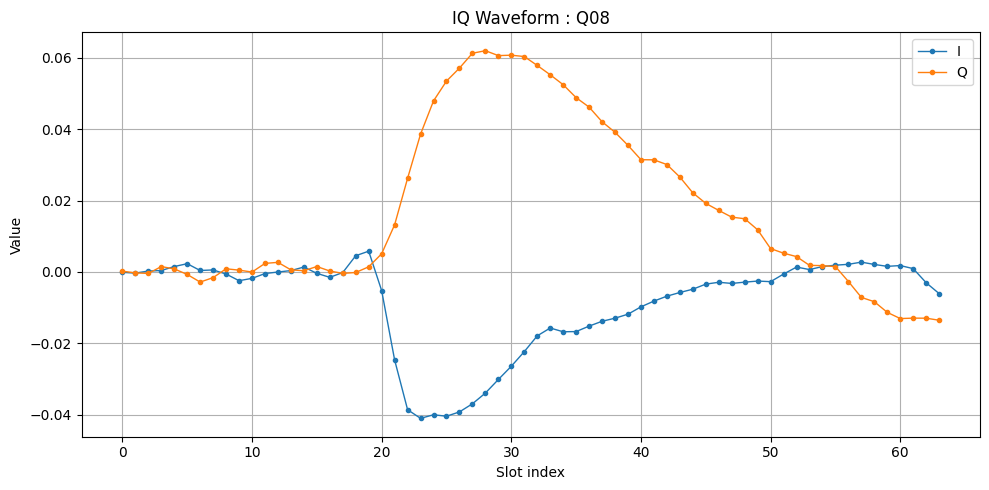

In [8]:
# グラフ描画

p = payloads[0]
fig, ax = plot_payload(p, program=PROGRAM)

job_id = 068e84aa-d8f9-7faf-8000-b74708a0ccaa
job_status = succeeded  elapsed=27.368


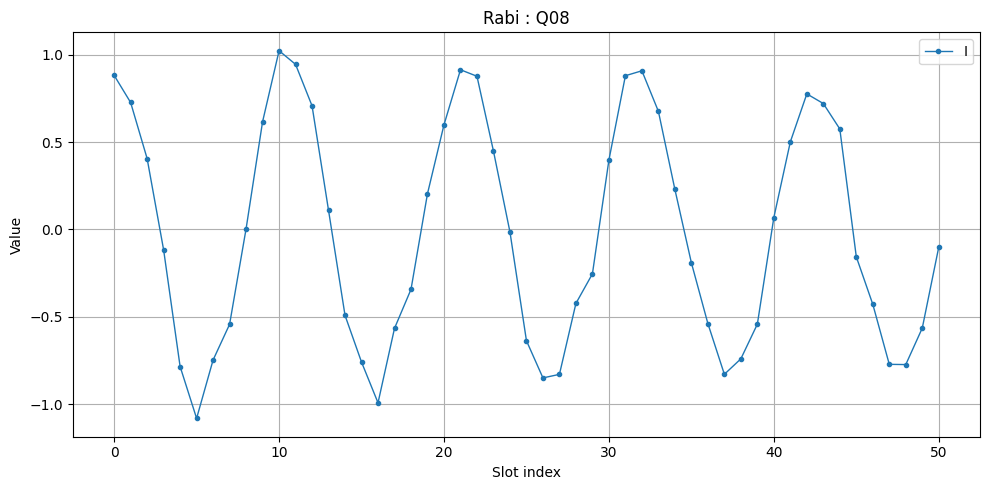

In [ ]:
# ラビ振動測定

DEVICE = "anemone"
PROGRAM = "check_rabi"

backend = OqtopusSseBackend()

job = backend.run_sse(
    file_path=f"program/{PROGRAM}.py",
    device_id=f"{DEVICE}-pulse",
    name=PROGRAM,
)
print(f"job_id = {job.job_id}")

job.wait_for_completion()
print(f"job_status = {job.status}  elapsed={job.execution_time}")

adapter = QuriAdapter(backend)

payloads = collect_payloads_from_job(
    backend=adapter,
    job_id=job.job_id,
)

# グラフ描画
p = payloads[0]
fig, ax = plot_payload(p, program=PROGRAM)


job_id = 068e84b8-bb28-773a-8000-812a42da2761
job_status = succeeded  elapsed=49.873


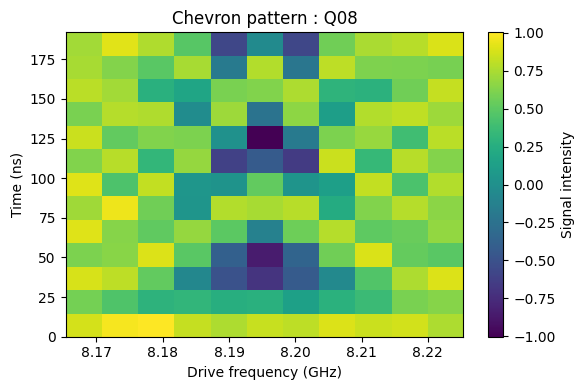

In [12]:
# シェブロンパターン測定

DEVICE = "anemone"
PROGRAM = "chevron_pattern"

backend = OqtopusSseBackend()

job = backend.run_sse(
    file_path=f"program/{PROGRAM}.py",
    device_id=f"{DEVICE}-pulse",
    name=PROGRAM,
)
print(f"job_id = {job.job_id}")

job.wait_for_completion()
print(f"job_status = {job.status}  elapsed={job.execution_time}")

adapter = QuriAdapter(backend)

payloads = collect_payloads_from_job(
    backend=adapter,
    job_id=job.job_id,
)

# グラフ描画
p = payloads[0]
fig, ax = plot_payload(p, program=PROGRAM)
